In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [18]:
np.random.seed(0)
num_samples = 200
num_features = 2
num_classes = 3

X, y = make_blobs(n_samples=num_samples, n_features=num_features, centers=num_classes, cluster_std=4.0, random_state=42)

In [20]:
y

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

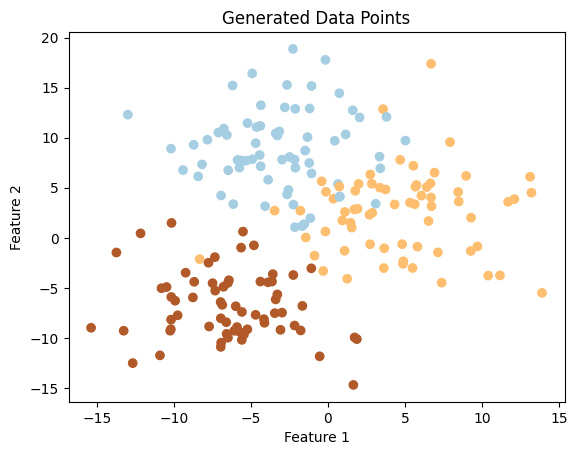

In [19]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data Points')
plt.show()

### One hot encoding 

In [22]:
def one_hot_encode(y, num_classes):
    y_encoded = np.zeros((len(y), num_classes))
    y_encoded[np.arange(len(y)), y] = 1
    return y_encoded

y_one_hot = one_hot_encode(y, num_classes)
y_one_hot

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

### Initialize Parameters

In [23]:
def initialize_params(num_features, num_classes):
    W = np.random.randn(num_features, num_classes)
    b = np.zeros(num_classes)
    return W, b

W, b = initialize_params(num_features, num_classes)

In [24]:
W

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788]])

In [25]:
b

array([0., 0., 0.])

### Softmax, Forward, Loss, Backward

In [27]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)

In [41]:
def forward(X, W, b):
    z = np.matmul(X, W) + b
    # a = softmax(z)
    return z

In [29]:
def compute_loss(y_one_hot, a):
    m = len(y_one_hot)
    return -np.sum(y_one_hot * np.log(a)) / m

In [30]:
def backward(X, y_one_hot, a):
    m = len(y_one_hot)
    dz = a - y_one_hot
    dW = np.dot(X.T, dz) / m
    db = np.sum(dz, axis=0) / m
    return dW, db

In [42]:
a = forward(X, W, b)

In [45]:
a[0, 0]

30.019183165509435

In [43]:
np.sum(a, axis=1)

array([ 50.15196963,  -2.30179333, -54.55692249, -78.99818735,
       -39.93348728, -26.12560415,  21.69748191, -46.18056332,
        51.50330621, -25.06008279,   8.36251982,  39.9923726 ,
        47.57567241,  15.68479182,  -2.36315252, -60.60316987,
        32.0026612 , -50.44979757,   9.18997955, -38.72931169,
        60.37184507,   6.60757101, -49.46878666,   3.34343208,
       -38.47774917,  19.48995218,  10.57446834, -37.7048407 ,
        -1.57946223, -11.32776676,  -4.40485158,  26.47371006,
       -47.74545451, -57.56835948,  44.14584153,  15.28593357,
       -45.03431237,  55.15164463, -46.4347623 ,  -3.40107808,
         1.4818321 ,   3.89045067, -49.71673941,  23.37148233,
       -27.24511284,  17.89135517,  -0.63933029, -47.11352031,
        -8.30450911,  35.96476577, -25.75906798,  14.88442167,
       -34.21373029,  18.89390437,  -7.26448045,  35.97370242,
       -40.79837576,   1.95789664,   7.40908359,  14.00754698,
       -38.44213513,  28.19266006, -28.00670978, -55.96